<a href="https://colab.research.google.com/github/choheeee22/ProgrammingAssignment2/blob/master/n121a_hypothesis_test_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 1*

# 📝 Assignment

# 가설 검정

## 1. One-Sample T-test 연습

### 데이터 불러오기
- [서울시 가로수 데이터셋](https://data.seoul.go.kr/dataList/367/S/2/datasetView.do)을 사용합니다.

다음 링크를 참조하세요. 
<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/seoul_tree/seoul_tree.txt>


In [1]:
# scipy 업그레이드
!pip install scipy --upgrade


Requirement already up-to-date: scipy in /usr/local/lib/python3.7/dist-packages (1.7.0)


In [2]:
#데이터 불러오기 
import pandas as pd
Seouldata='https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/seoul_tree/seoul_tree.txt'
df=pd.read_csv(Seouldata,sep = '\t', skiprows = 1,thousands=',')
df.head

<bound method NDFrame.head of       기간      자치구   노선수      수량    은행나무  ...    무궁화    소나무   목련   이팝나무      기타
0   2019      서울시  1412  307351  108050  ...  2,374  4,539  378  20088  20,112
1   2019      종로구    70    7329    4072  ...      -    239    -    711      29
2   2019       중구    48    8250    3640  ...     46  2,162    -    470     817
3   2019      용산구    39    7835    4444  ...      -     51  126    198     780
4   2019      성동구    38    8120    1090  ...      -     53    -    709     646
5   2019      광진구    28    7223    1247  ...      -     20  113    760     443
6   2019     동대문구    43   10664    3749  ...      1      -    -   1176     456
7   2019      중랑구    57    8365    2774  ...    212     64    -    449   1,156
8   2019      성북구    78    8449    2722  ...      5     97    -    853     547
9   2019      강북구    31    7789    3510  ...      -  1,007    -    575     410
10  2019      도봉구    63    9572    4914  ...    214     15    -     47   1,070
11  2019      노원구    5

In [3]:
df.dtypes

기간         int64
자치구       object
노선수        int64
수량         int64
은행나무       int64
양버즘나무      int64
느티나무       int64
왕벚나무      object
은단풍나무     object
메타세콰이어    object
회화나무      object
가죽나무      object
감나무       object
수양버들      object
튜울립나무     object
칠엽수       object
포플러       object
느릅나무      object
살구나무      object
무궁화       object
소나무       object
목련        object
이팝나무       int64
기타        object
dtype: object

### "서울시에는 구별로 평균 약 400 그루 정도의 `이팝나무`가 있다"라는 가설에 대해 가설검정을 시행하세요.

- 단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외합니다.
- 가설검정 결과의 pvalue 값을 `pv1`에 저장하세요. (`.pvalue` 사용)

In [4]:
df1=df.transpose()

In [5]:
#자치구를 header로 설정 df1
new_header=df1.iloc[1]
df1=df1[2:]
df1.columns=new_header
df1

자치구,서울시,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,공원녹지사업소,시설관리공단
노선수,1412,70,48,39,38,28,43,57,78,31,63,50,35,39,92,69,55,81,30,114,29,32,56,60,99,66,1,9
수량,307351,7329,8250,7835,8120,7223,10664,8365,8449,7789,9572,14489,9880,8627,14538,13501,13719,11548,6603,18220,7083,10154,16548,23349,22858,17152,236,15250
은행나무,108050,4072,3640,4444,1090,1247,3749,2774,2722,3510,4914,6505,4324,3474,3353,5622,3977,3594,3545,5879,2178,2280,3800,7210,11894,5474,179,2600
양버즘나무,62474,1071,162,1422,2401,2306,3342,2759,1282,934,323,3336,1653,1890,3581,3992,706,1527,1024,3439,829,2188,5036,7559,4180,4284,26,1222
느티나무,37473,619,460,373,1975,1057,855,471,1014,324,779,1165,680,721,3056,1065,2231,1884,407,3419,1421,185,3409,2991,2400,2417,24,2071
왕벚나무,"34,150",421,289,262,602,940,747,354,"1,656",497,"2,095","1,612","1,748",732,"1,096",956,"2,508","2,157","1,123","2,952","1,127","2,416",254,"2,455",992,"2,309",-,"1,850"
은단풍나무,545,-,-,-,29,-,-,-,66,284,6,-,-,-,-,-,-,13,-,147,-,-,-,-,-,-,-,-
메타세콰이어,"5,171",1,-,-,48,-,60,74,65,-,61,285,16,25,474,74,"1,651",3,35,51,116,95,"1,159",864,14,-,-,-
회화나무,"7,816",140,176,37,325,153,143,-,38,103,32,41,422,80,967,176,201,-,177,99,8,149,478,524,-,57,-,"3,290"
가죽나무,52,1,-,-,33,-,7,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,11,-,-,-,-,-


In [6]:
# 서울시, 공원녹지사업소, 시설관리공단 data drop 후 df2 로 저장
df2=df1.drop(["서울시","공원녹지사업소","시설관리공단"],axis=1)
df2

자치구,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
노선수,70,48,39,38,28,43,57,78,31,63,50,35,39,92,69,55,81,30,114,29,32,56,60,99,66
수량,7329,8250,7835,8120,7223,10664,8365,8449,7789,9572,14489,9880,8627,14538,13501,13719,11548,6603,18220,7083,10154,16548,23349,22858,17152
은행나무,4072,3640,4444,1090,1247,3749,2774,2722,3510,4914,6505,4324,3474,3353,5622,3977,3594,3545,5879,2178,2280,3800,7210,11894,5474
양버즘나무,1071,162,1422,2401,2306,3342,2759,1282,934,323,3336,1653,1890,3581,3992,706,1527,1024,3439,829,2188,5036,7559,4180,4284
느티나무,619,460,373,1975,1057,855,471,1014,324,779,1165,680,721,3056,1065,2231,1884,407,3419,1421,185,3409,2991,2400,2417
왕벚나무,421,289,262,602,940,747,354,"1,656",497,"2,095","1,612","1,748",732,"1,096",956,"2,508","2,157","1,123","2,952","1,127","2,416",254,"2,455",992,"2,309"
은단풍나무,-,-,-,29,-,-,-,66,284,6,-,-,-,-,-,-,13,-,147,-,-,-,-,-,-
메타세콰이어,1,-,-,48,-,60,74,65,-,61,285,16,25,474,74,"1,651",3,35,51,116,95,"1,159",864,14,-
회화나무,140,176,37,325,153,143,-,38,103,32,41,422,80,967,176,201,-,177,99,8,149,478,524,-,57
가죽나무,1,-,-,33,-,7,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,11,-,-,-


In [7]:
df2.index

Index(['노선수', '수량', '은행나무', '양버즘나무', '느티나무', '왕벚나무', '은단풍나무', '메타세콰이어', '회화나무',
       '가죽나무', '감나무', '수양버들', '튜울립나무', '칠엽수', '포플러', '느릅나무', '살구나무', '무궁화',
       '소나무', '목련', '이팝나무', '기타'],
      dtype='object')

In [8]:
df2.loc['이팝나무']

자치구
종로구      711
중구       470
용산구      198
성동구      709
광진구      760
동대문구    1176
중랑구      449
성북구      853
강북구      575
도봉구       47
노원구      142
은평구      443
서대문구     493
마포구     1280
양천구      784
강서구     1426
구로구     1082
금천구      184
영등포구    1281
동작구      397
관악구      249
서초구      446
강남구      768
송파구     1651
강동구      642
Name: 이팝나무, dtype: object

In [9]:
#가설 - "서울시에는 구별로 평균 약 400 그루 정도의 이팝나무가 있다"
tree1=df2.loc['이팝나무']
tree1

자치구
종로구      711
중구       470
용산구      198
성동구      709
광진구      760
동대문구    1176
중랑구      449
성북구      853
강북구      575
도봉구       47
노원구      142
은평구      443
서대문구     493
마포구     1280
양천구      784
강서구     1426
구로구     1082
금천구      184
영등포구    1281
동작구      397
관악구      249
서초구      446
강남구      768
송파구     1651
강동구      642
Name: 이팝나무, dtype: object

In [10]:
#numpy 이용해서 구하기 
import numpy as np
np.mean(df2.loc['이팝나무'])

688.64

In [11]:
#가설 검증
from scipy import stats
stats.ttest_1samp(tree1,400)

Ttest_1sampResult(statistic=3.3809205562101288, pvalue=0.002470712850935819)

In [12]:
pv1=0.002470712850935819
pv1

0.002470712850935819

### 이번에는 10개의 구를 샘플링하여, 위에 대한 가설검정을 다시 한번 시행해보세요.

- 단, 아래의 코드를 참조하여 sample을 위한 seed 는 123로 설정하세요.
- 가설검정 결과의 pvalue값을 `pv2`에 저장하세요


In [13]:
#10개의 구 sampling
import numpy as np
tree2=np.random.seed(123)
tree3=np.random.choice(df2.loc['이팝나무'], size = 10)

In [14]:
print(tree2)

None


In [15]:
tree3

array([1280, 198, 198, 449, 184, 397, 142, 768, 470, 711], dtype=object)

In [16]:
#nemeric으로 변환
tree3=pd.to_numeric(tree3)

In [17]:
tree3

array([1280,  198,  198,  449,  184,  397,  142,  768,  470,  711])

In [18]:
#random seed 역할 알아보기
tree2_f=np.random.seed(3)
tree3_f=np.random.choice(df2.loc['이팝나무'], size = 10)
tree3_f

array([142, 642, 709, 642, 575, 711, 446, 397, 142, 443], dtype=object)

In [19]:
stats.ttest_1samp(tree3,400)

Ttest_1sampResult(statistic=0.706555193453698, pvalue=0.49772576203804575)

In [20]:
pv2=0.49772576203804575
pv2

0.49772576203804575

## 2. Two-Sample T-test 연습

### "서울시의 구별 평균 느티나무수와 왕벚나무의 수는 차이가 없다"라는 가설에 대해 가설검정을 시행하세요.

- 단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외합니다.
- 가설검정 결과의 pvalue를 `pv3`에 저장하세요

In [21]:
#df2 다시 확인하기
df2.head()


자치구,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
노선수,70,48,39,38,28,43,57,78,31,63,50,35,39,92,69,55,81,30,114,29,32,56,60,99,66
수량,7329,8250,7835,8120,7223,10664,8365,8449,7789,9572,14489,9880,8627,14538,13501,13719,11548,6603,18220,7083,10154,16548,23349,22858,17152
은행나무,4072,3640,4444,1090,1247,3749,2774,2722,3510,4914,6505,4324,3474,3353,5622,3977,3594,3545,5879,2178,2280,3800,7210,11894,5474
양버즘나무,1071,162,1422,2401,2306,3342,2759,1282,934,323,3336,1653,1890,3581,3992,706,1527,1024,3439,829,2188,5036,7559,4180,4284
느티나무,619,460,373,1975,1057,855,471,1014,324,779,1165,680,721,3056,1065,2231,1884,407,3419,1421,185,3409,2991,2400,2417


In [22]:
#데이터 타입 확인하게, 느티나무 tree4
tree4=df2.loc['느티나무']
tree4=pd.to_numeric(tree4)
tree4

자치구
종로구      619
중구       460
용산구      373
성동구     1975
광진구     1057
동대문구     855
중랑구      471
성북구     1014
강북구      324
도봉구      779
노원구     1165
은평구      680
서대문구     721
마포구     3056
양천구     1065
강서구     2231
구로구     1884
금천구      407
영등포구    3419
동작구     1421
관악구      185
서초구     3409
강남구     2991
송파구     2400
강동구     2417
Name: 느티나무, dtype: int64

In [23]:
#왕벚나무 숫자로 바꾸기 tree5
tree5 = pd.to_numeric(df2.loc['왕벚나무'].str.replace(',',''))

In [24]:
#느티나무&왕벚나무 평균 (tree6&tree7)
tree6=tree4.mean()
tree7=tree5.mean()
tree6,tree7

(1415.12, 1292.0)

In [25]:
stats.ttest_ind(tree4,tree5)

Ttest_indResult(statistic=0.4629256014492562, pvalue=0.6455096880085703)

In [26]:
pv3=0.6455096880085703
pv3

0.6455096880085703


### Two-Sample One-tailed test를 사용하여 **평균 느티나무수가 왕벚나무 수보다 크다**라는 가설에 대한 가설검정을 시행하세요.
- 해당 가설검정의 결과를 `ans`에 저장하세요.

이 때 `ans`가 가질 수 있는 값은 아래와 같습니다 :
1. "느티나무" ( 느티나무의 수가 통계적으로 유의하게 많은 경우 )
2. "왕벚나무" ( 왕벚나무의 수가 통계적으로 유의하게 많은 경우 )
3. "없음" (통계적으로 유의하지 않은 경우)

Two-Sample One-tailed test를 scipy에서 하는 방법은 아래의 링크를 참고 하세요  
참고 링크 : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [27]:
#평균 느티나무수가 왕벚나무 수보다 크다 (tree4, tree5) tree4>tree5

stats.ttest_ind(tree4,tree5,alternative='greater')

Ttest_indResult(statistic=0.4629256014492562, pvalue=0.32275484400428517)

In [28]:
ans="느티나무"
ans

'느티나무'

## 🔥 **도전과제**
> 2문제 모두 하면 됩니다.



### 1. Compare mean for multiple-sample 
 
다음 링크를 참조하세요. <https://reneshbedre.github.io/blog/anova.html>

구별, 은행나무, 양버즘나무, 느티나무에 대해서 ANOVA Test를 실행하세요.

단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외합니다.

In [29]:
#data 이름 바꾸기 (challenge df - cdf)
cdf=df2
cdf=cdf.transpose()
cdf.head()

,노선수,수량,은행나무,양버즘나무,느티나무,왕벚나무,은단풍나무,메타세콰이어,회화나무,가죽나무,감나무,수양버들,튜울립나무,칠엽수,포플러,느릅나무,살구나무,무궁화,소나무,목련,이팝나무,기타
자치구,,,,,,,,,,,,,,,,,,,,,,
종로구,70,7329,4072,1071,619,421,-,1,140,1,-,8,-,17,-,-,-,-,239,-,711,29
중구,48,8250,3640,162,460,289,-,-,176,-,-,-,7,-,-,-,21,46,"2,162",-,470,817
용산구,39,7835,4444,1422,373,262,-,-,37,-,74,-,13,16,-,-,39,-,51,126,198,780
성동구,38,8120,1090,2401,1975,602,29,48,325,33,146,-,-,1,3,59,-,-,53,-,709,646
광진구,28,7223,1247,2306,1057,940,-,-,153,-,25,-,58,101,-,-,-,-,20,113,760,443


In [30]:
cdf.dtypes

노선수       object
수량        object
은행나무      object
양버즘나무     object
느티나무      object
왕벚나무      object
은단풍나무     object
메타세콰이어    object
회화나무      object
가죽나무      object
감나무       object
수양버들      object
튜울립나무     object
칠엽수       object
포플러       object
느릅나무      object
살구나무      object
무궁화       object
소나무       object
목련        object
이팝나무      object
기타        object
dtype: object

In [31]:
cdf.apply(pd.to_numeric, errors='ignore')
pd.DataFrame(cdf.isnull().sum(),columns=['결측치개수'])

,결측치개수
노선수,0
수량,0
은행나무,0
양버즘나무,0
느티나무,0
왕벚나무,0
은단풍나무,0
메타세콰이어,0
회화나무,0
가죽나무,0


In [32]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv 
!rm ~/.cache/matplotlib -rf

import matplotlib as mpl
mpl.rc("font", family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


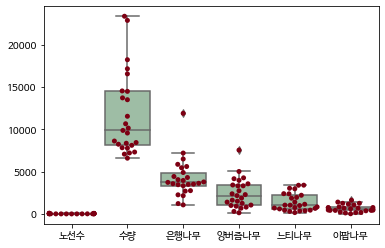

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(data=cdf, color='#99c2a2');
ax = sns.swarmplot(data=cdf, color='#7d0013');
plt.show()

### 2. Sampling

- 세션 시간에 배웠던 4가지 sampling (Simple Random, Systematic, Stratified Random, Cluster) 방식을 구현해보세요.

- 이를 위한 데이터는 1 부터 100을 담은 numpy array이며, Sampling 해야 하는 수는 20개 입니다.

- Stratified Random Sampling을 위한 그룹을 나누는 기준은 1-10, 11-20, ... 과 같은 방식입니다.

- Cluster Sampling에서 그룹을 나누는 기준은 5로 나눴을때의 나머지 값입니다. (0,1,2,3,4)